# HW1: Introduction to TensorFlow
Welcome to Homework 1  &#128522;&#9996;

 <div dir='rtl'style="text-align: right;font-family:verdana;">

کتابخانه  TensorFlow 
به طور گسترده در مسائل یادگیری ماشین کاربرد دارد. در این تمرین نحوه محاسبات و نحوه تعریف یک شبکه عصبی ساده را در TensorFlow یاد می‌گیریم.  برای شروع ابتدا کتابخانه‌ها و پکیج‌های مورد نیاز را import می‌کنیم. 

In [1]:

# %tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2021-11-17 23:56:11.036873: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


## A) تنسورها

 <div dir='rtl'style="text-align: right;font-family:verdana;">
 
 همانطور که می‌دانیم Tensor ها به عنوان آرایه‌های n بعدی از انواع داده‌های پایه مانند یک رشته (string) یا عدد صحیح (integer) شناخته می‌شوند. 
 در سلول‌های زیر مثال‌هایی از Tensor های صفر و یک بعدی آورده شده است.


In [2]:
Science = tf.constant("chemistry", tf.string)
number = tf.constant(3.14159265358, tf.float64)

print("`Science` is a {}-d Tensor".format(tf.rank(Science).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`Science` is a 0-d Tensor
`number` is a 0-d Tensor


2021-11-17 23:56:12.744548: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-17 23:56:12.746765: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-17 23:56:12.821096: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-17 23:56:12.821759: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce MX230 computeCapability: 6.1
coreClock: 1.531GHz coreCount: 2 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 52.21GiB/s
2021-11-17 23:56:12.821830: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-11-17 23:56:12.833928: I tensorflow/stream_executor/platform/default/dso_lo

In [3]:
Sciences = tf.constant(["chemistry", "mathematics"], tf.string)
numbers = tf.constant([3.14, 5.16, 2.97], tf.float64)

print("`Sciences` is a {}-d Tensor with shape: {}".format(tf.rank(Sciences).numpy(), tf.shape(Sciences)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`Sciences` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


<div dir='rtl'style="text-align: right;font-family:verdana;">


در مرحله بعد تنسورهای مرتبه بالاتر را در نظر می‌گیریم. همانطور که می‌دانید انواع تصاویر رنگی که در مسائل یادگیری عمیق و پردازش تصویر با آنها سروکار داریم در واقع تنسور هستند. 

**تمرین :**
 در سلول زیر یک تنسور دو بعدی (ماتریس) با ابعاد 4*3 با آرایه‌های دلخواه و یک تنسور 4 بعدی با ابعاد دلخواه تعریف کنید. 


In [4]:
# TODO ...

# 2D matrix:
two_d_matrix = tf.random.uniform(shape=[3,4])
print(f"a {tf.rank(two_d_matrix).numpy()}-d Tensor with shape: {two_d_matrix.shape}")
print('-'*100)
print(two_d_matrix)
# 4D tensor:
four_d_tensor = tf.random.normal(shape=[2,3,3,4])
print(f"a {tf.rank(four_d_tensor).numpy()}-d Tensor with shape: {four_d_tensor.shape}")
print('-'*100)
print(four_d_tensor)

a 2-d Tensor with shape: (3, 4)
----------------------------------------------------------------------------------------------------
tf.Tensor(
[[0.52402616 0.29212022 0.5317086  0.354084  ]
 [0.09723163 0.60891354 0.3893454  0.6638955 ]
 [0.6267822  0.33055055 0.10908985 0.05992329]], shape=(3, 4), dtype=float32)
a 4-d Tensor with shape: (2, 3, 3, 4)
----------------------------------------------------------------------------------------------------
tf.Tensor(
[[[[-0.80067825  1.0877737   1.2519954   1.4058203 ]
   [ 1.1869309  -1.8826132   0.5765994  -0.13091   ]
   [-1.2363367   0.23839091  1.755183    0.78128046]]

  [[ 0.16469145 -0.36891323 -0.13413483 -2.0457785 ]
   [-0.1847496  -0.6674807   0.7942632  -0.07020399]
   [-0.0538817   0.9645653   0.09229865 -0.36218154]]

  [[-0.24470812 -1.492814   -0.26430935  1.1967964 ]
   [-1.014761    0.29732212 -2.260184   -0.67377293]
   [ 1.1342013   0.20038015 -0.6211003  -1.5863273 ]]]


 [[[-0.5052801  -0.51772696 -1.682381   -1.752788

<div dir='rtl'style="text-align: right;font-family:verdana;">


**تمرین:**
برای ماتریسی که در سلول قبل تعریف کردید، ردیف سوم و ستون دوم ماتریس و همچنین آرایه قرار گرفته در ردیف اول و ستون دوم را نشان دهید. 

In [5]:
#  The third row of the matrix
Third_row = two_d_matrix[2]
#  The second column of the matrix
second_column = two_d_matrix[:,1]
# matrix array
scalar_array = two_d_matrix[0, 1]


## B)  محاسبات روی تنسورها

<div dir='rtl'style="text-align: right;font-family:verdana;">

عملیات ریاضی مختلفی را می‌توانیم بر روی تنسورها انجام داده و نتایج را مشاهده کنیم. برای مثال در سلول زیر عمل جمع روی دو مقدار ثابت a و b انجام شده است. 


In [6]:
a = tf.constant(21)
b = tf.constant(67)
c1 = tf.add(a,b)
print(c1)

tf.Tensor(88, shape=(), dtype=int32)


<div dir='rtl'style="text-align: right;font-family:verdana;">

**تمرین:**
تابع ساده‌ای در سلول زیر نوشته تا محاسبات زیر را انجام دهد:

$e = (a-3)*(2a+b)$




In [7]:
# Please Define a function 
def func(a,b):
    e = (a - 3) * (2 * a + b)
    return e


 <div dir='rtl'style="text-align: right;font-family:verdana;">

**تمرین:**
  مقدار خروجی این تابع را به ازای  a = 1 و b = 2 نشان دهید:

In [8]:
# compute the  function output  for a=1 , b=2
func(1, 2)

-8


## C)  شبکه‌های عصبی

<div dir='rtl'style="text-align: right;font-family:verdana;">

در ادامه می‌خواهیم یاد بگیریم که چگونه یک مدل شبکه عصبی ساده با استفاده از Tensorflow بنویسیم. 
برای شروع ابتدا یک perceptron ساده با تنها یک لایه $ y = \sigma(Wx + b)$ در نظر می‌گیریم. 


**تمرین :** 
با توجه به موارد زیر در سلول زیر کد یک لایه پرسپترون ساده را با استفاده از Tensorflow بنویسید: 

- W  ماتریس وزن
- b بایاس
- x ورودی
- $\sigma$ تابع فعال‌ساز سیگموید
- y خروجی


In [9]:
### Please Defining simple perseptron with one layer ###
def perseptron(W, b, x):
    sum = tf.add(tf.matmul(tf.transpose(W), x), b)
    return tf.sigmoid(sum)


w_ = tf.constant([1,1], dtype=tf.float32, shape=(2,1))
b_ = tf.constant(-0.5)

for i in range(2):
    for j in range(2):
        and_ij = perseptron(w_, b_, tf.constant([i,j], dtype=tf.float32, shape=(2,1)))
        print(f"{i}^{j}: {1 if and_ij>0.5 else 0}")

0^0: 0
0^1: 1
1^0: 1
1^1: 1


### Keras Sequential API 

<div dir='rtl'style="text-align: right;font-family:verdana;">

استفاده از Keras Sequential API  یک روش بسیار راحت برای ایجاد مدل‌های شبکه عصبی است. یک مدل متوالی همانطور که از اسم آن پیداست، به شما این امکان را می‌دهد که مدل‌های لایه به لایه را به صورت مرحله به مرحله ایجاد کنید. این روش آسان ترین و در عین حال محدود کننده ترین روش برای ایجاد مدل است. نمونه‌هایی از معماری‌های پی در پی که ممکن است قبلا از آنها استفاده کرده باشید و یا دیده باشید، عبارتند از:


*   LeNet
*   AlexNet
*   VGGNet






**تمرین:**
حال  با استفاده از کتابخانه keras و مدل Sequential یک لایه کاملا متصل (fully connected) بنویسید.




In [10]:
### Please Defining a neural network using keras  ###
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

fully_connected_model = Sequential([
    Dense(4, activation="relu")
])


<div dir='rtl'style="text-align: right;font-family:verdana;">

**تمرین:**

مدل نوشته شده در سلول قبلی را با استفاده از یک ورودی نمونه تست کنید.

In [11]:
# Test your model 
x = tf.ones((3,4))
print(fully_connected_model(x))

print('weights:')
print(fully_connected_model.get_weights())

tf.Tensor(
[[0.        1.6125267 0.        0.       ]
 [0.        1.6125267 0.        0.       ]
 [0.        1.6125267 0.        0.       ]], shape=(3, 4), dtype=float32)
weights:
[array([[-0.7947121 ,  0.7848967 , -0.81979364, -0.47662362],
       [-0.26481688,  0.4197889 , -0.79354614,  0.45974523],
       [ 0.32361704,  0.01392519, -0.6722709 , -0.4373809 ],
       [ 0.43524617,  0.39391595,  0.39810532,  0.2735147 ]],
      dtype=float32), array([0., 0., 0., 0.], dtype=float32)]


### Model subclassing with Keras 

<div dir='rtl'style="text-align: right;font-family:verdana;">

یک روش دیگر برای پیاده‌سازی معماری مدل، model subclassing نامیده می‌شود. در این روش به طور کامل قابل تنظیم است و شما را قادر می‌سازد که مدل سفارشی خود را پیاده‌سازی کنید. با این حال این انعطاف‌پذیری هزینه‌هایی هم در بر دارد.

**تمرین:**
راجع به مزایا و معایای این روش پیاده‌سازی بحث کنید:


**تمرین:**

 شبکه عصبی که در بالا به صورت Sequential تعریف کردید به صورت Subclassing تعریف کنید و مدل را به ازای ورودی داده شده، تست کنید.

In [12]:
###  Please Defining  model using subclassing ###




In [13]:
# Test your model 
# TODO

### Backpropagation

<div dir='rtl'style="text-align: right;font-family:verdana;">

پس از آشنایی اولیه با ساختن لایه‌های شبکه عصبی می‌توانیم توجه خود را به نحوه پیاده‌سازی آموزش شبکه با backpropagation معطوف کنیم، برای این منظور می‌توانیم از  GradientTape tf استفاده کنیم. 

هنگامی که یک forward pass در شبکه داریم، تمامی این مسیرها توسط "tape" ضبط می‌شود و سپس در محاسبه گرادیان مسیر بازگشت از آنها استفاده می‌شود. به طور پیش فرض "tape" ها بعد از بازگشت به عقب برداشته می‌شود، در واقع tf.GradientTape  خاص فقط می‌تواند یک گرادیان را محاسبه کند. 

برای تابع ساده $ y = x^2$ گرادیان را محاسبه می‌کنیم: 

In [14]:
### Gradient computation ###

# y = x^2
# Example: x = 3.0
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  y = x * x
dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


<div dir='rtl'style="text-align: right;font-family:verdana;">

اکنون درک می‌کنیم که چگونه از GradientTape برای محاسبه مشتقات استفاده کنیم. در مثال زیر می‌توانیم از روش SGD برای به دست آوردن minimun تابع $L=(x-x_f)^2$ استفاده کنیم. که در این مثال $x_f$ یک متغیر برای مقدار مورد نظر است که سعی می‌کنیم برای آن بهینه‌سازی کنیم. 


**تمرین:**

الگوریتم SGD  را برای تعداد تکرار مشخصی نوشته و با استفاده از tf.GradientTape گرادیان‌ها را محاسبه کنید. همچنین نمودار مربوط به مقدار واقعی و مقدار تخمین زده شده را بر اساس تعداد تکرارها رسم کنید. 

  



In [15]:
### Function minimization ###


def sgd_minimize(x_f, x):
    with tf.GradientTape() as tape:
        L = (x - x_f)**2
        gradient = tape.gradient(L, x)
    return x - alpha * gradient


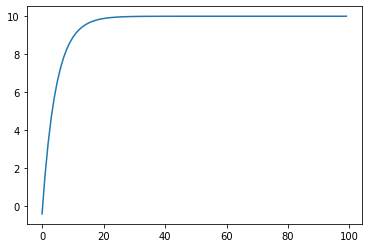

In [16]:
# Please plot the evolution of x 
alpha = tf.Variable(0.1)
x = tf.Variable(-3.0)
weights = []
for i in range(100):
    x = sgd_minimize(10, x)
    x = tf.Variable(x)
    weights.append(x)
plt.plot(range(100), weights)